In [1]:
import fenics as fe
import mshr
import cv2
import tlib
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from fenics import *
%matplotlib inline  


In [2]:
'Load image, contour, and define absorbing point'
im = cv2.imread('/Users/rsatija/Downloads/test.tif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im, 1, 255, 0)
contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[2]  # by inspection
pts = np.reshape(contour, newshape=(-1, 2))
ys = pts[:, 0]
xs = pts[:, 1]
# Generate mesh on domain
mesh_resolution = 30
pts_pp = [fe.Point(pt[0],  pt[1]) for pt in pts]
pts_pp = list(reversed(pts_pp))  # counter-clockwise order
#pts_pp = list((pts_pp))  # counter-clockwise order
pol = mshr.Polygon(pts_pp)
mesh = mshr.generate_mesh(pol, mesh_resolution)


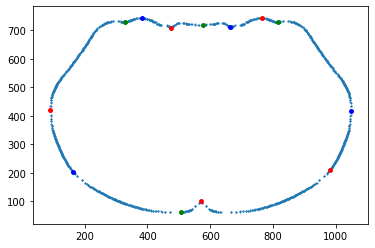

In [68]:
#1275 540 712

plt.scatter(ys, xs,s=1);
index = 1275
plt.scatter(ys[index], xs[index], color='r', s=15);
index = 1300
plt.scatter(ys[index], xs[index], color='g', s=15);
index = 165
plt.scatter(ys[index], xs[index], color='b', s=15);
index = 285
plt.scatter(ys[index], xs[index], color='r', s=15);
index = 507
plt.scatter(ys[index], xs[index], color='g', s=15);
index = 540
plt.scatter(ys[index], xs[index], color='b', s=15);

index = 588
plt.scatter(ys[index], xs[index], color='r', s=15);
index = 625
plt.scatter(ys[index], xs[index], color='g', s=15);
index = 660
plt.scatter(ys[index], xs[index], color='b', s=15);
index = 712
plt.scatter(ys[index], xs[index], color='r', s=15);
index = 744
plt.scatter(ys[index], xs[index], color='g', s=15);
index = 965
plt.scatter(ys[index], xs[index], color='b', s=15);
index = 1080
plt.scatter(ys[index], xs[index], color='r', s=15);




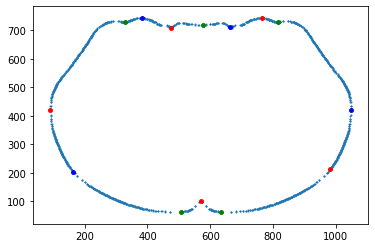

In [83]:
indices = (1275, 1300, 165, 285, 507, 540, 588, 625, 660, 712, 744, 965, 1080,1250)
cols = ('r','g','b','r','g','b','r','g','b','r','g','b','r','g','b','r','g','b','r','g','b','r','g','b')
plt.scatter(ys, xs,s=1);
for i in range(len(indices)):
    index=indices[i]
    col=cols[i]
    plt.scatter(ys[index], xs[index], color=col, s=15);



In [78]:
def boundary_D(x, on_boundary):
    return on_boundary and (fe.near(x[1], x_abs, tol) and (fe.near(x[0], y_abs, tol)))

In [79]:
def makeplot(index):
    V = fe.FunctionSpace(mesh, 'P', 1)  
    # formula must be written in C++ syntax
    u_D = fe.Expression('-1', degree=2)
    bc = fe.DirichletBC(V, u_D, boundary_D)
    # cast to variational problem
    u = fe.TrialFunction(V)
    v = fe.TestFunction(V)
    f = fe.Constant(-1.0)
    g = fe.Constant(0)
    a = fe.dot(fe.grad(u), fe.grad(v)) * fe.dx
    L = f * v * fe.dx + g * v * fe.ds
    #Compute solution and display it
    u = Function(V)
    solve(a == L, u, bc)
    return(u)

def plot2array(myfig):
    #fig.set_size_inches(10,10)
    fig.canvas.draw()
    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    data1=data[:,:,1] 
    return(data1)




/Users/rsatija/Downloads/m1_landmark1.csv
/Users/rsatija/Downloads/m1_landmark2.csv


/Users/rsatija/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


/Users/rsatija/Downloads/m1_landmark3.csv
/Users/rsatija/Downloads/m1_landmark4.csv
/Users/rsatija/Downloads/m1_landmark5.csv
/Users/rsatija/Downloads/m1_landmark6.csv
/Users/rsatija/Downloads/m1_landmark7.csv
/Users/rsatija/Downloads/m1_landmark8.csv
/Users/rsatija/Downloads/m1_landmark9.csv
/Users/rsatija/Downloads/m1_landmark10.csv
/Users/rsatija/Downloads/m1_landmark11.csv
/Users/rsatija/Downloads/m1_landmark12.csv
/Users/rsatija/Downloads/m1_landmark13.csv
/Users/rsatija/Downloads/m1_landmark14.csv


<Figure size 432x288 with 0 Axes>

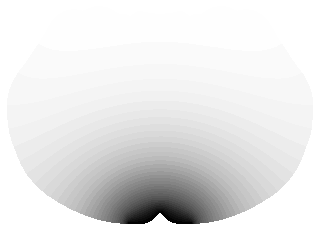

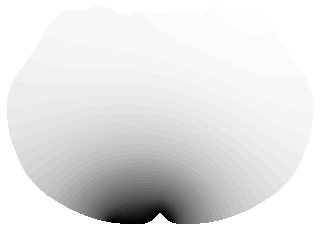

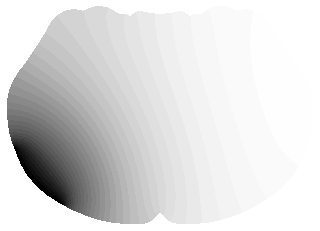

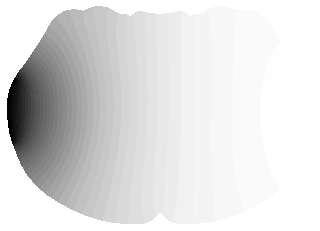

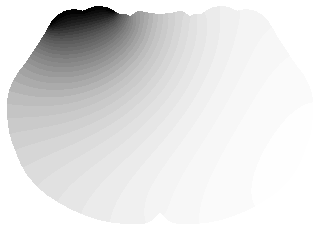

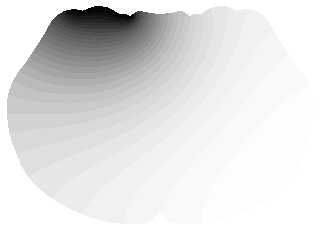

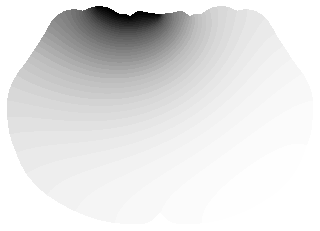

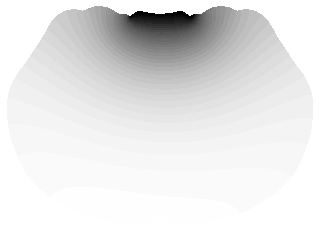

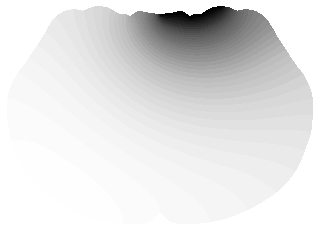

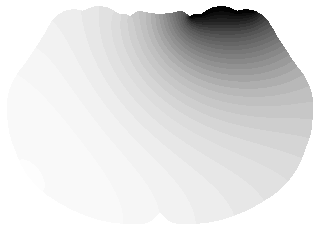

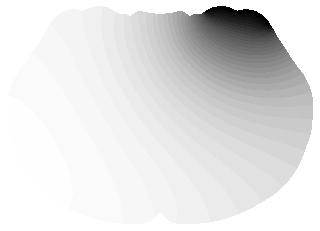

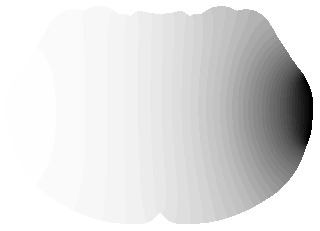

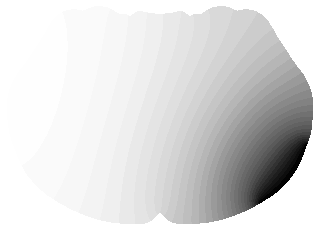

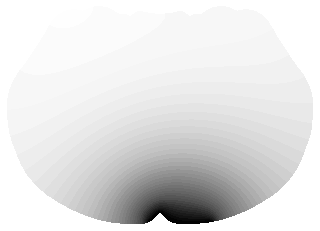

In [94]:
filebase = '/Users/rsatija/Downloads/m1_landmark'
for i in range(len(indices)):
    index=indices[i]
    col=cols[i]
    #plt.scatter(ys[index], xs[index], color=col, s=15);
    file = filebase + str(i+1) + '.csv'
    print(file)
    y_abs = ys[index]
    x_abs = xs[index]
    vxs=makeplot(index)
    plt.set_cmap('Greys')
    fig = plt.figure()
    plt.axis('off')
    plot(vxs)
    data = plot2array(fig)
    np.savetxt(file,data,delimiter=",")


/Users/rsatija/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


<Figure size 432x288 with 0 Axes>

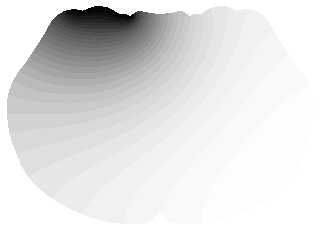

In [7]:
#for testing 

index=540
y_abs = ys[index]
x_abs = xs[index]
vxs=makeplot(index)
plt.set_cmap('Greys')
fig = plt.figure()
plt.axis('off')
plot(vxs)
data = plot2array(fig)



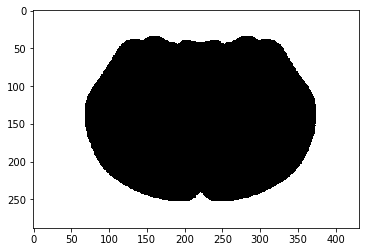

In [93]:
#mask 

data2=255 - data
data2=np.where(data2>0.01, 255, 0)
np.savetxt('/Users/rsatija/Downloads/m1_mask.csv',data2,delimiter=",")
plt.imshow(data2)